In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/train.csv')


In [4]:
df.shape


(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.sample(8)

,id,qid1,qid2,question1,question2,is_duplicate
139833,139833,222332,222333,Has the Microsoft Surface been a hit or miss?,Should I get Surface Pro 4 8 GB or 16 GB?,0
313617,313617,7799,438219,How do I get started with Android application ...,How can I develop Android application?,0
194259,194259,294417,294418,How will the purchase of Marketo by Vista Equi...,What is it like to work at Marketo?,0
327434,327434,1979,145705,I accidentally took my blood pressure medicine...,Does Percocet raise blood pressure?,0
82965,82965,57394,1127,How can I earn money using YouTube?,How do I make money through YouTube?,1
387559,387559,519878,519879,What are the best flirting stories?,What is your best flirting story?,1
99914,99914,165800,165801,Which is the best camera phone under 10000 rs?,Which is the best camera phone under Rupees 10...,1
133185,133185,213099,213100,How can I get a job at Sephora?,How can I get hired at Sephora?,1


In [7]:
df.info

<bound method DataFrame.info of             id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287                                  What is one coin?   
404288  What is the approx annual cost of living while...   
404289              What is like to have sex with cousin?   

                                                question2  is_duplicate  
0       What is the step by step guide to invest in sh...             0  
1       What would happen if the Indian government sto...             0  
2       How can Internet speed be increased by hacking...             0  
3       Find the remainder when [math]23^{24}[/math] i...             0  
4                 Which fish would survive in salt water?             0  
...                                                   ...           ...  
404285  How many keywords are there in PERL Programmin...             0  
404286         Is it true that there is life after death?             1  
404287                                  What's this coin?             0  
404288  I am having little hairfall problem but I want...             0  
404289      What is it like to have sex with your cousin?             0  

[404290 rows x 6 columns]>

In [8]:
#to check the null value
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

As the number of null values are negligible infront of the size of dataset. We will drop the rows completely.

In [9]:
df.dropna(inplace = True)

In [10]:
df.shape

(404287, 6)

In [11]:
# to check if there are any duplicate rows
df.duplicated().sum()

0

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

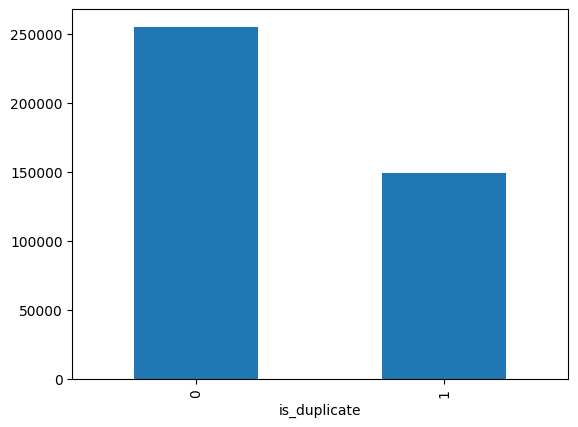

In [12]:
#to check the distribution of duplicate and non-duplicate distribution of data
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

The above bar graph and percentage shows that the datasets are unbalanced as there is more dataset which are non duplicate than duplicate.

In [13]:
#to check that how many questions are repeated/unique in the dataset
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537929
Number of questions getting repeated 111778


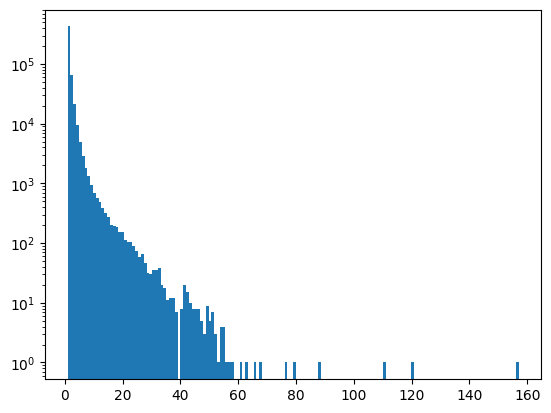

In [14]:
# Repeated questions histogram
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [15]:
new_df = df

In [16]:
#Feature Engineering
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()


In [17]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


minimum characters 1
maximum characters 623
average num of characters 59


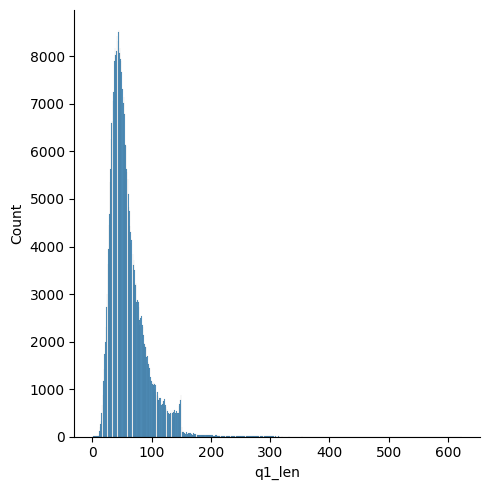

In [18]:
# plot of the number length of questions in question1 set
sns.displot(new_df['q1_len'])
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average num of characters', int(new_df['q1_len'].mean()))

minimum characters 1
maximum characters 1169
average num of characters 60


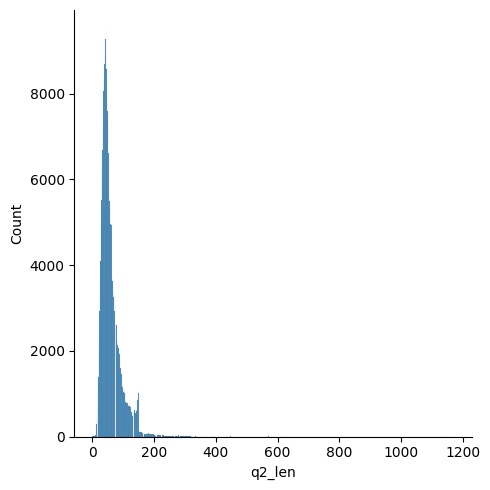

In [19]:
# plot of the number length of questions in question2 set
sns.displot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average num of characters', int(new_df['q2_len'].mean()))

In [20]:
# to calculate the number of words in question1 and question2
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


minimum words 1
maximum words 125
average num of words 10


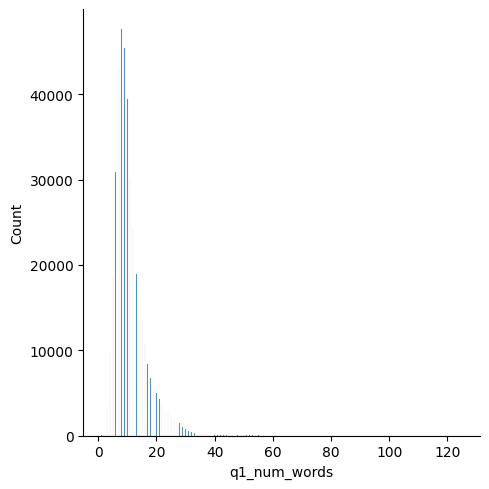

In [21]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


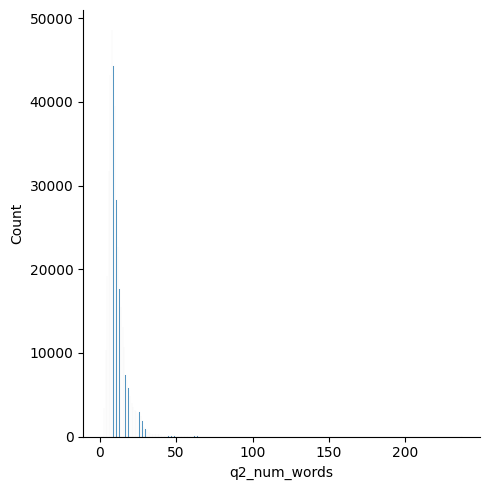

In [22]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

In [23]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [24]:
# to calculate common words
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


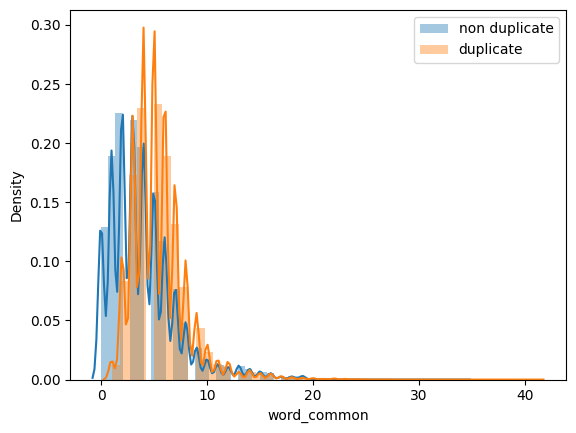

In [25]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

In [26]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [27]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


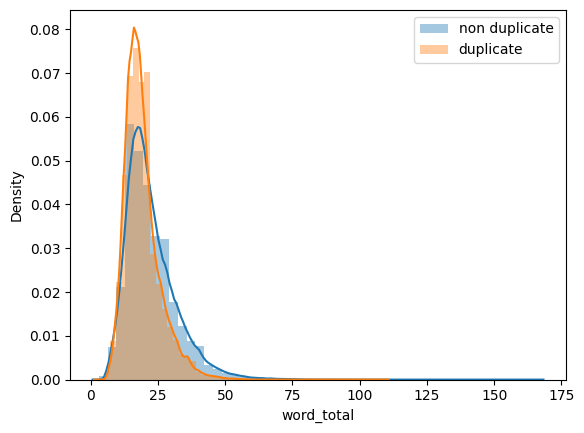

In [28]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

In [29]:
# calculted word_share | word_share = word_common/word_total
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.10


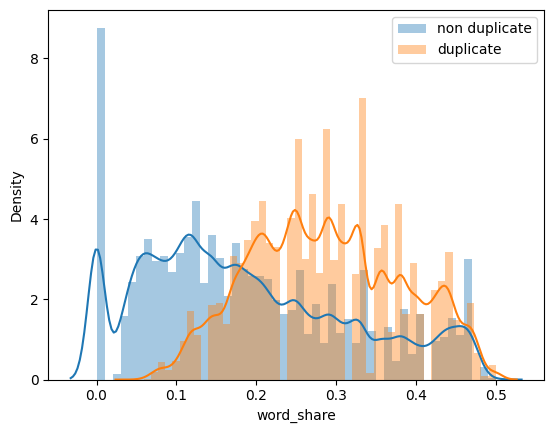

In [30]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

# **RandomForest**

In [31]:
new_df = new_df.drop('question1', axis=1)
new_df = new_df.drop('question2', axis=1)

new_df.head()

,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,0,66,57,14,12,10,23,0.43
1,1,3,4,0,51,88,8,13,4,20,0.20
2,2,5,6,0,73,59,14,10,4,24,0.17
3,3,7,8,0,50,65,11,9,0,19,0.00
4,4,9,10,0,76,39,13,7,2,20,0.10


In [32]:
y = new_df['is_duplicate']
X = new_df.drop('is_duplicate', axis=1)

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1875, random_state=42)
print('X_train is {}, X_test is {}, y_train is {} and y_test is {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train is (262786, 10), X_test is (80858, 10), y_train is (262786,) and y_test is (80858,)


In [34]:
X_train

,id,qid1,qid2,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
232040,232040,341981,33081,40,36,7,8,2,15,0.13
397544,397544,24618,129698,61,31,14,6,2,20,0.10
385450,385450,517581,517582,27,63,5,11,0,16,0.00
398386,398386,531606,531607,110,129,20,24,7,42,0.17
66422,66422,115130,82404,39,45,6,7,2,13,0.15
...,...,...,...,...,...,...,...,...,...,...
1743,1743,3471,3472,140,243,23,45,8,56,0.14
220097,220097,323715,327133,57,49,10,10,2,20,0.10
219756,219756,51114,25139,55,52,10,9,7,19,0.37
240867,240867,330901,352776,86,56,15,10,3,22,0.14


In [35]:

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.7735536372405947

In [36]:
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
# Calculate F1 score
f1_rf = f1_score(y_test, y_pred_rf)
# Print the results
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

Random Forest - Precision: 0.7114283617146212
Random Forest - Recall: 0.649805577902923
Random Forest - F1 Score: 0.6792221443587947


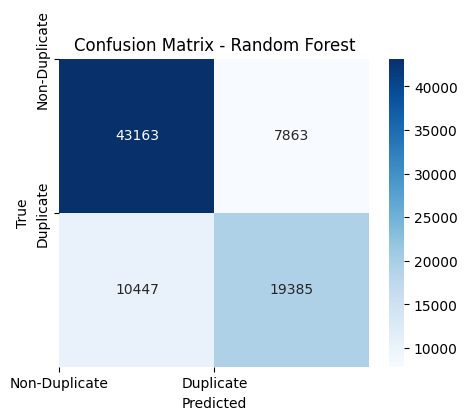

In [37]:

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")

# Set tick labels
tick_labels = ['Non-Duplicate', 'Duplicate']
plt.xticks(np.arange(2), tick_labels)
plt.yticks(np.arange(2), tick_labels)

# Display the plot
plt.show()


# **XGBoost**

In [38]:

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
accuracy_xgb

0.7837196072126444

In [39]:
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
# Calculate F1 score
f1_xgb = f1_score(y_test, y_pred_xgb)
# Print the results
print("XGBoost - Precision:", precision_xgb)
print("XGBoost - Recall:", recall_xgb)
print("XGBoost - F1 Score:", f1_xgb)

XGBoost - Precision: 0.7305565932013448
XGBoost - Recall: 0.6555711987127917
XGBoost - F1 Score: 0.6910356524504434


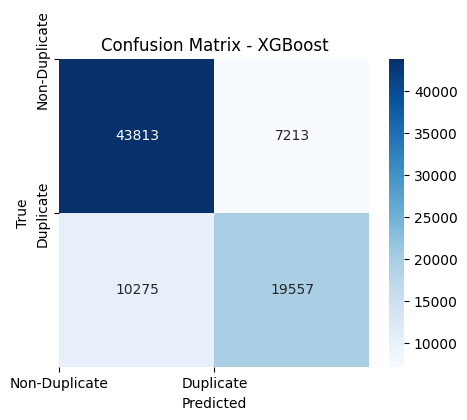

In [40]:

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - XGBoost")

# Set tick labels
tick_labels = ['Non-Duplicate', 'Duplicate']
plt.xticks(np.arange(2), tick_labels)
plt.yticks(np.arange(2), tick_labels)

# Display the plot
plt.show()


# **NaiveBayes**

In [41]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_nb= naive_bayes_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_nb

0.6845333795048109

In [42]:
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
# Calculate F1 score
f1_nb = f1_score(y_test, y_pred_nb)
# Print the results
print("Naive_Bayes - Precision:", precision_nb)
print("Naive_Bayes - Recall:", recall_nb)
print("Naive_Bayes - F1 Score:", f1_nb)

Naive_Bayes - Precision: 0.5901058597982829
Naive_Bayes - Recall: 0.47462456422633414
Naive_Bayes - F1 Score: 0.5261026269832423


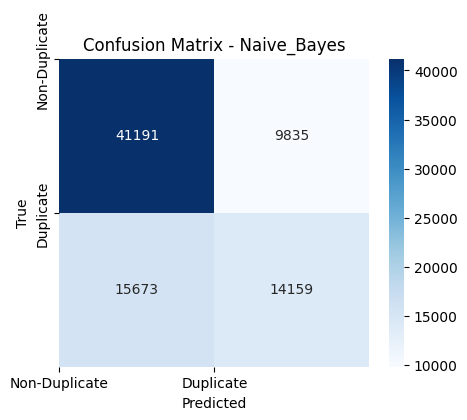

In [43]:
# Calculate the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Naive_Bayes")

# Set tick labels
tick_labels = ['Non-Duplicate', 'Duplicate']
plt.xticks(np.arange(2), tick_labels)
plt.yticks(np.arange(2), tick_labels)

# Display the plot
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
Logistic_regression_model = LogisticRegression()
Logistic_regression_model.fit(X_train, y_train)
y_pred_lg= Logistic_regression_model.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred_lg)
accuracy_lg

0.7052487076108734

In [48]:
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
# Calculate F1 score
f1_lg = f1_score(y_test, y_pred_lg)
# Print the results
print("logistic_regression - Precision:", precision_lg)
print("logistic_regression - Recall:", recall_lg)
print("logistic_regression - F1 Score:", f1_lg)

logistic_regression - Precision: 0.7165547613890694
logistic_regression - Recall: 0.3326964333601502
logistic_regression - F1 Score: 0.45441018245083903


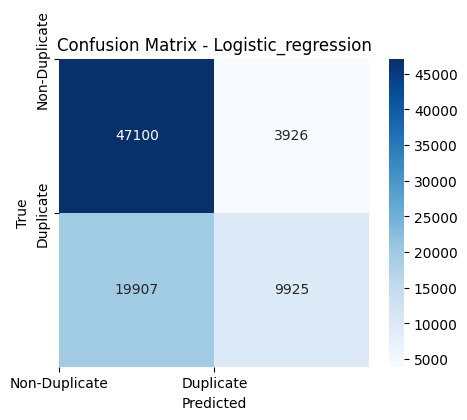

In [49]:
# Calculate the confusion matrix
cm_lg = confusion_matrix(y_test, y_pred_lg)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lg, annot=True, cmap="Blues", fmt="d")

# Set labels, title, and ticks
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic_regression")

# Set tick labels
tick_labels = ['Non-Duplicate', 'Duplicate']
plt.xticks(np.arange(2), tick_labels)
plt.yticks(np.arange(2), tick_labels)

# Display the plot
plt.show()

# **MODEL COMPARISON**

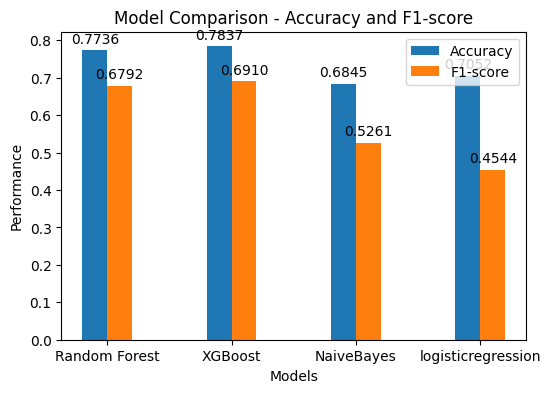

In [47]:
import numpy as np
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost','NaiveBayes','logisticregression']
accuracy_values = [accuracy_rf, accuracy_xgb,accuracy_nb,accuracy_lg]
f1_macro_avg_values = [f1_rf, f1_xgb, f1_nb,f1_lg]

bar_width = 0.20

r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(r1, accuracy_values, width=bar_width, label='Accuracy')
rects2 = ax.bar(r2, f1_macro_avg_values, width=bar_width, label='F1-score')

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Performance')
ax.set_xticks([r + bar_width/2 for r in range(len(models))])
ax.set_xticklabels(models)
ax.set_title('Model Comparison - Accuracy and F1-score')
ax.legend()

plt.show()

# **Conclusion**
From the above Model results it is clear that our two best models are XGboost
with an accuracy of 78.37 and RandomForest with an accuracy of 77.35. According
to accuracy, the XGBoost model gives a slightly better result than RandomForest
but when we see the confusion Matrix of both the models, for the column of False
Positive where models have predicted a Duplicated Question as Non Duplicate is
more in XGBoost as compared to RandomForest.
